<a href="https://colab.research.google.com/github/shreyasat27/MSc-QT-/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 48.5 MB/s eta 0:00:00


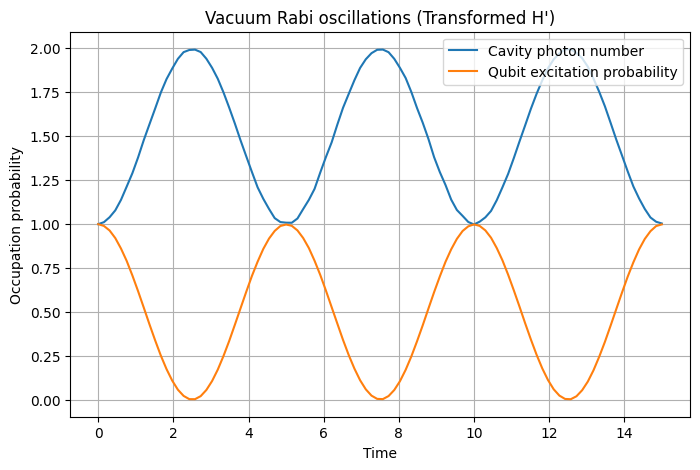

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define system parameters
omega = 2 * np.pi
g = 0.1 * 2 * np.pi  # Coupling strength
N = 3  # Number of Fock states in the cavity
theta = np.pi / 4  # Angle determining the qubit orientation
kappa = 0.00005  # Cavity dissipation rate
gamma = 0.0005  # Qubit relaxation rate
tlist = np.linspace(0, 15, 100)  # Time array for simulation
epsilon = 2 * omega * np.sin(theta)  # Energy detuning of the qubit
t_c = 1 * omega * np.cos(theta)  # Tunnel coupling between qubit states

# Initial state
psi0 = tensor(basis(N, 1), basis(2, 0))  # Qubit in ground state, 1 photon in cavity

# Operators
a = tensor(destroy(N), qeye(2))  # Cavity annihilation operator
adag = a.dag()  # Cavity creation operator
sigma_x = tensor(qeye(N), sigmax())
sigma_z = tensor(qeye(N), sigmaz())
idn = tensor(qeye(N), qeye(2))  # Identity operator

# Hamiltonians
H_interaction = (g * (a + adag)) * (np.cos(theta) * sigma_x + np.sin(theta) * sigma_z)
H_matrix = np.sqrt(((epsilon/2)**2) + t_c**2) * sigma_z
omega_R = 2 * np.sqrt(((epsilon/2)**2) + t_c**2)
H_res = omega_R * a.dag() * a
H = H_matrix + H_interaction + H_res  # Original Hamiltonian

# Generate S = -i H0 t
H0 = omega_R * a.dag() * a - (omega / 2) * sigma_z
S = (-1j * H0).expm()

# Compute transformed Hamiltonian H' = e^S H e^(-S)
H_prime = S * H * S.dag()

# Solve the master equation
c_ops = []
output = mesolve(H_prime, psi0, tlist, c_ops, [a.dag() * a, (sigma_z + idn) / 2])

# Plot results
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(tlist, output.expect[0], label="Cavity photon number")
ax.plot(tlist, output.expect[1], label="Qubit excitation probability")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Occupation probability")
ax.set_title("Vacuum Rabi oscillations (Transformed H')")
plt.grid()
plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define system parameters
omega_R = 2 * np.pi  # Resonator frequency
omega_q = 1 * np.pi  # Qubit frequency
g = 0.1 * 2 * np.pi  # Coupling strength
theta = np.pi / 4    # Qubit orientation angle
N = 3                # Number of Fock states in the cavity
tlist = np.linspace(0, 10, 100)  # Time range

# Operators
a = tensor(destroy(N), qeye(2))  # Cavity annihilation operator
adag = a.dag()  # Cavity creation operator
sigma_x = tensor(qeye(N), sigmax())
sigma_y = tensor(qeye(N), sigmay())
sigma_z = tensor(qeye(N), sigmaz())
I = tensor(qeye(N), qeye(2))  # Identity

# Define H0 and Hint
H0 = omega_R * adag * a - (omega_q / 2) * sigma_z
Hint = g * (a + adag) * (np.cos(theta) * sigma_x + np.sin(theta) * sigma_z)

# Compute S = -i H0 t
t_sym = 1  # Pick a fixed time t for transformation
S = (-1j * H0 * t_sym).expm()

# Compute transformed Hamiltonian H'
H_prime = S * Hint * S.dag()

# Print Hamiltonian matrices
print("Original Interaction Hamiltonian:\n", Hint)
print("\nTransformed Hamiltonian H':\n", H_prime)




Original Interaction Hamiltonian:
 Quantum object: dims=[[3, 2], [3, 2]], shape=(6, 6), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.          0.          0.44428829  0.44428829  0.          0.        ]
 [ 0.          0.          0.44428829 -0.44428829  0.          0.        ]
 [ 0.44428829  0.44428829  0.          0.          0.62831853  0.62831853]
 [ 0.44428829 -0.44428829  0.          0.          0.62831853 -0.62831853]
 [ 0.          0.          0.62831853  0.62831853  0.          0.        ]
 [ 0.          0.          0.62831853 -0.62831853  0.          0.        ]]

Transformed Hamiltonian H':
 Quantum object: dims=[[3, 2], [3, 2]], shape=(6, 6), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.          0.          0.44428829 -0.44428829  0.          0.        ]
 [ 0.          0.         -0.44428829 -0.44428829  0.          0.        ]
 [ 0.44428829 -0.44428829  0.          0.          0.62831853 -0.62831853]
 [-0.44428829 -0.44428829  0.          0.         -0.62

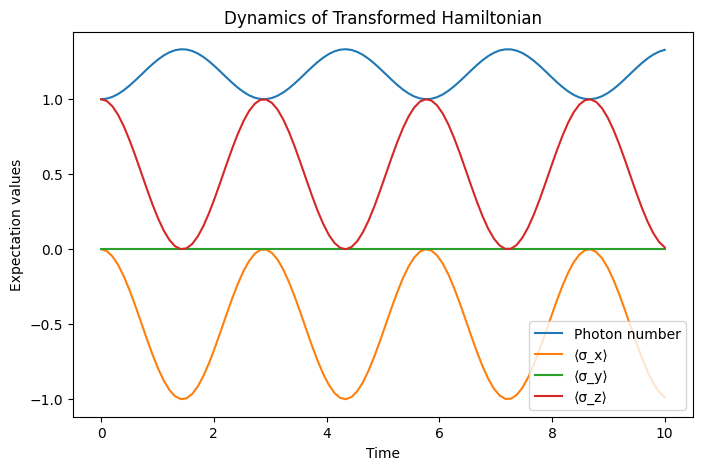

In [15]:
# Solve Schrödinger equation
psi0 = tensor(basis(N, 1), basis(2, 0))  # Initial state: 1 photon, qubit in |0>
result = mesolve(H_prime, psi0, tlist, [], [a.dag() * a, sigma_x, sigma_y, sigma_z])

# Plot results
plt.figure(figsize=(8,5))
plt.plot(tlist, result.expect[0], label="Photon number")
plt.plot(tlist, result.expect[1], label="⟨σ_x⟩")
plt.plot(tlist, result.expect[2], label="⟨σ_y⟩")
plt.plot(tlist, result.expect[3], label="⟨σ_z⟩")
plt.xlabel("Time")
plt.ylabel("Expectation values")
plt.legend()
plt.title("Dynamics of Transformed Hamiltonian")
plt.show()